In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



In [2]:
dataset = pd.read_csv('mushroom.csv')

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
for column in dataset.columns:
    dataset[column] = pd.factorize(dataset[column])[0]

In [6]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']


In [7]:
print(X)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             0            0          0        0     0                0   
1             0            0          1        0     1                0   
2             1            0          2        0     2                0   
3             0            1          2        0     0                0   
4             0            0          3        1     3                0   
...         ...          ...        ...      ...   ...              ...   
8119          4            0          0        1     3                1   
8120          0            0          0        1     3                1   
8121          3            0          0        1     3                1   
8122          4            1          0        1     6                0   
8123          0            0          0        1     3                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          0       

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
print(X_train)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
5314          0            0          2        0     4                0   
2075          0            0          1        0     2                0   
5165          3            0          2        0     4                0   
1155          1            1          2        0     1                0   
4448          0            1          1        1     4                0   
...         ...          ...        ...      ...   ...              ...   
4931          0            1          4        0     3                0   
3264          0            2          3        1     4                0   
1653          0            0          3        1     3                0   
2607          3            2          0        0     3                0   
2732          0            1          3        0     3                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
5314             0          1       

In [10]:
print(X_test)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
380           0            1          0        0     0                0   
3641          3            1          3        0     3                0   
273           0            1          1        0     1                0   
1029          0            0          2        1     3                0   
684           0            2          0        0     3                0   
...         ...          ...        ...      ...   ...              ...   
520           0            0          2        0     2                0   
36            2            2          3        1     3                0   
7959          4            1          4        1     4                0   
6520          0            1          4        1     6                0   
6005          3            1          4        1     7                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
380              0          0       

In [11]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
print(y_pred)

[0 1 1 ... 0 0 0]


In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print("Accuracy:", accuracy)

Accuracy: 0.9278096800656276


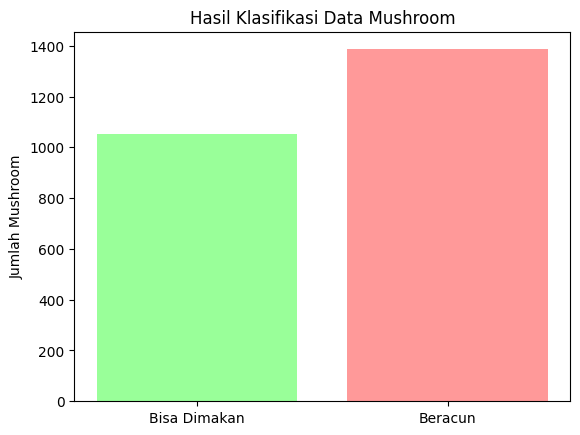

In [28]:
# Hasil Visualisasi dengan Bar chart
x_pos = np.arange(len(labels))
plt.bar(x_pos, sizes, color=colors)
plt.xticks(x_pos, labels)
plt.ylabel('Jumlah Mushroom')
plt.title('Hasil Klasifikasi Data Mushroom')
plt.show()

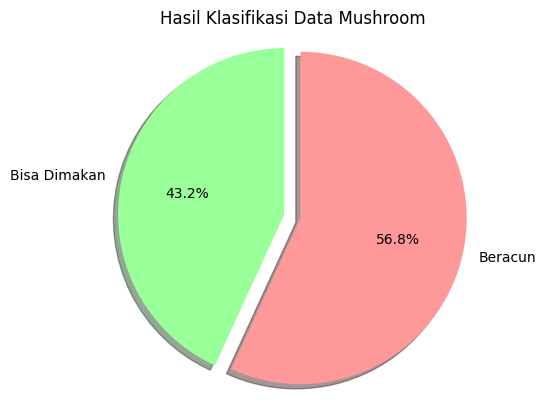

In [26]:
# Hasil Visualisasi dengan Pie chart
labels = ['Bisa Dimakan', 'Beracun']
sizes = [np.count_nonzero(y_pred==0), np.count_nonzero(y_pred==1)]
colors = ['#99ff99', '#ff9999']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Hasil Klasifikasi Data Mushroom')
plt.show()